In [27]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

# 定义被积函数 f(theta, phi)
def integrand(phi, theta, gamma):
    numerator = 1 + gamma * np.sin(theta)**2 * np.cos(phi) * np.sin(phi)
    denominator = np.sin(theta)**2 * (1 + 2 * gamma * np.cos(phi) * np.sin(phi) + gamma**2 * np.sin(phi)**2) + np.cos(theta)**2
    return 5 * (numerator / denominator) * np.sin(theta) * gamma

# 计算 Q(t', t) 的数值积分
def calculate_Q(gamma):
    result, _ = dblquad(integrand, 0, np.pi, lambda theta: 0, lambda theta: 2 * np.pi, args=(gamma,))
    return result / (4 * np.pi)

# 定义记忆函数 M(t-t')
def memory_function(t, t_prime, G, lambda_i):
    return G / lambda_i * np.exp((t_prime - t) / lambda_i)

# 计算应力的函数
def calculate_stress(t_values, gamma_values, Q_values, G, lambda_i):
    dt = t_values[1] - t_values[0]  # 时间步长
    stress = np.zeros_like(t_values)
    
    for i, t in enumerate(t_values):
        gamma = gamma_values[i]  # 获取当前时间步的 gamma 值
        Q = Q_values[i]  # 使用预先计算好的 Q 值
        
        t_prime_values = t_values[t_values <= t]  # 获取当前时间步之前的所有时间点
        M_values = memory_function(t, t_prime_values, G, lambda_i)
        stress[i] = np.sum(M_values * Q * dt)
    
    return stress

# 设置参数
G = 1.0
lambda_i = 1
t_start = 0.0
dt = 0.01
omega = np.pi  # 角频率
T = 2 * np.pi / omega  # 周期
t_end = 5*T

# 生成时间数组
t_values = np.arange(t_start, t_end, dt)

# 设置应变为一个常数
strain_constant = 1  # 应变常数值
gamma_values = np.full(len(t_values), strain_constant)  # 生成一个全为常数的数组

# 提前计算 Q 数组
Q_values = np.array([calculate_Q(gamma) for gamma in gamma_values])

# 计算应力
stress = calculate_stress(t_values, gamma_values, Q_values, G, lambda_i)


NameError: name 't_values' is not defined

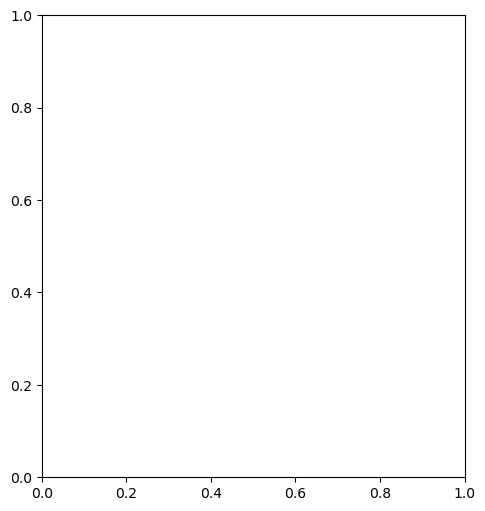

In [2]:
import matplotlib.pyplot as plt
# 可视化结果

plt.figure(figsize=(12, 6))

# 绘制应力随时间的变化
plt.subplot(1, 2, 1)
plt.plot(t_values, stress)
plt.xlabel('Time')
plt.ylabel('Stress')
plt.title('Stress vs Time')

# 绘制 Q 随时间的变化
plt.subplot(1, 2, 2)
#plt.plot(t_values, Q_values)
plt.xlabel('Time')
plt.ylabel('Q')
plt.title('Q vs Time')

plt.tight_layout()
plt.show()
# 可视化结果
plt.figure(figsize=(18, 6))  # 调整画布大小以容纳更多子图

# 绘制应力随应变的变化
plt.subplot(1, 3, 2)
#plt.plot(gamma_values, stress)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress vs Strain')

# 绘制应力随 Q 的变化
plt.subplot(1, 3, 3)
#plt.plot(Q_values, stress)
plt.xlabel('Q')
plt.ylabel('Stress')
plt.title('Stress vs Q')

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import os
# 计算应变率（对应变函数求导）
strain_rate = np.gradient(gamma_values, t_values)  # 使用 numpy 的 gradient 函数计算应变率
# 创建一个 DataFrame 来保存数据
data = {
    'Time': t_values,
    'σ12': stress,
    'γ12': gamma_values,
    'γ12_dot': strain_rate,
    'Q': Q_values
}
df = pd.DataFrame(data)

# 将数据保存到 Excel 文件中
excel_file = 'data/Doi_edwards_train.xlsx'
# 检查文件是否存在
if os.path.exists(excel_file):
    # 如果文件存在，追加新的工作簿
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        df.to_excel(writer, sheet_name='const', index=False)
else:
    # 如果文件不存在，创建新的文件
    with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
        df.to_excel(writer, sheet_name='const', index=False)
        

print(f"数据已保存到 {excel_file}")

数据已保存到 data/Doi_edwards_train.xlsx
